### 卷积练习

In [9]:
from __future__ import print_function
from obspy import *
import numpy as np
from scipy import interpolate, signal
from time import *
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            # Use ASCII minus
                            'axes.unicode_minus': False,
                            })
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 3
plt.rcParams['lines.linewidth'] = 0.5

### 卷积概念


在地震学中，我们经常处理的是线性系统。在最一般的意义上，线性系统是一种基于线性算子的数学模型。在这里，这个算子是卷积。线性系统的输出信号是输入信号与系统的脉冲响应的卷积。在地震学中的线性系统示例包括：

地震仪 - 一个物理线性系统，改变记录信号
Green's函数（格林函数）- 地球对脉冲激发的响应
滤波器 - 数学线性系统
...
在这些线性系统中，输出与输入之间存在简单的比例关系，这使得我们能够用数学方法对信号进行分析和处理。由于线性系统具有这种稳定的特性，它们在地震学中具有重要的应用，如地震仪的数据处理、地震波传播模拟以及滤波器的使用等。

其中 $x(t)$ 是输入信号，$h(t)$ 是权重函数，$(x * h)(t)$ 是卷积结果。

 $$ y(t) = h(t) * x(t) \equiv \int_{-\infty}^{\infty} x(\tau)h(t-\tau)d\tau \\ = \int_{-\infty}^{\infty} x(t-\tau)h(\tau)d\tau = x(t) * h(t) $$ 


$h(t)$ 被称为系统的 脉冲响应（impulse response）。它也可以被称为 卷积函数 或 核函数。直观地说，它是系统的 特性，是描述线性系统对输入信号所进行的数学处理。  


离散卷积的数学表达式为：  

 $$ (x+h)[k] \equiv \sum_{i=0}^{m} x[i]h[k-i] \hspace{1cm}  $$ 

 $$ x_i \hspace{1cm} i=0,1,2,...,m $$
 $$ h_j \hspace{1cm} j=1,2,...,n $$
 $$ k = 0,1,2,...,m+n-1 $$

卷积具有几个有用的性质    
 $\hspace{4cm}$ 交换律 $\hspace{2cm} x(t)*h(t)= h(t)*x(t)$    
 $\hspace{4cm}$ 分配律 $\hspace{2cm} x(t) * [h(t)+g(t)] = [x(t)*h(t)]+[x(t)*g(t)] $    
 $\hspace{4cm}$ 结合律 $\hspace{2cm} a[x(t)*h(t)] = [ax(t)]*h(t)$      
 $\hspace{4cm}$ 乘法单位元 $\hspace{1.4cm} x(t) * \delta(t) = x(t) \hspace{0.5cm}$  and   $\hspace{0.5cm} x(t)*H(t) = \int x(t)dt $

*__卷积定理__*:

 $$ F\{x(t)*h(t)\} = F\{x(\omega)\} \cdot F\{h(\omega)\}   $$

 ---
### 卷积函数

以下部分旨在理解卷积对输入信号的作用。在第一个单元格中，我们定义了一个函数，该函数将信号和脉冲响应作为输入，并提供它们的卷积结果。定义一个方波函数、一个Rieker小波和一个$\cos$信号。    

In [10]:
# 定义一个卷积函数。
def conv(x, y):
    """ 计算两个信号x和y的离散卷积。
    In
    ----------
    x:第一个信号,输入(array of floats)
    y:第二个信号,卷积函数，也称为核函数(array of floats)
    
    Out
    -------
    c:卷积结果 (array of floats)
    """
    m = len(x)
    n = len(y)
    # 将所有卷积值设置为零。
    c = np.zeros(m+n-1)              
    
    for i in range(0, m):
        for j in range(0, n):
            c[i] += x[i-j] * y[j]
            
    return c

number of samples of input signals: 4096


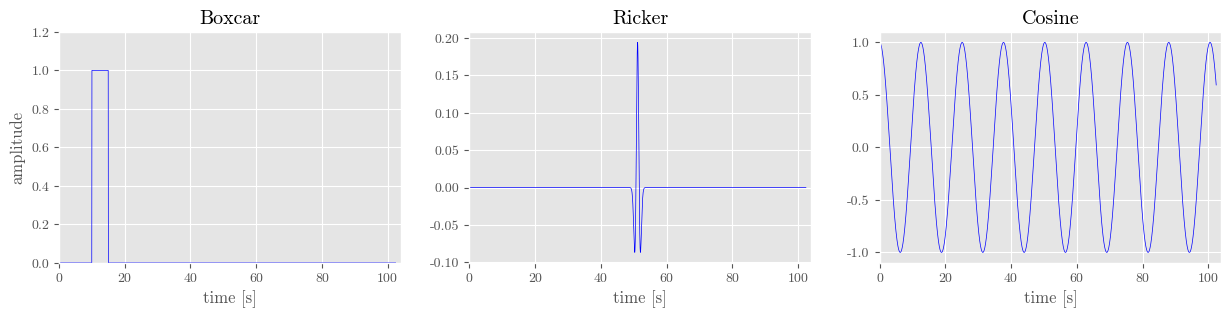

In [11]:
# 创建信号
npts = 4096                               # 样本数
dt = 0.025                                # 采样率
t = np.linspace(0,npts*dt,npts)           # 绘图的时间轴

box = np.zeros(npts)                      # 方形函数
for i in range(400,600):
    box[i] = 1.
rk = signal.ricker(npts, 20.0)            # Rieker wavelet
cosine = np.cos(t/2)                      # cosine wavelet
print('number of samples of input signals:', npts)

# 绘图
plt.rcParams['figure.figsize'] = 15, 3
xmax = 104                               
plt.subplot(131)
plt.plot(t, box, 'b')
plt.ylim(0,1.2)
plt.xlim(0,xmax)
plt.xlabel('time [s]')
plt.title('Boxcar')
plt.ylabel('amplitude')

plt.subplot(132)
plt.plot(t, rk, 'b')
plt.xlim(0,xmax)
plt.title('Ricker')
plt.xlabel('time [s]')

plt.subplot(133)
plt.plot(t, cosine, 'b')
plt.title('Cosine')
plt.xlim(0,xmax)
plt.xlabel('time [s]')

plt.show()

1st run: 9.1125 seconds needed for calculation
2nd run: 0.0043 seconds needed for calculation
number of samples of input signals: 4096
number of samples of convolved signal: 8191


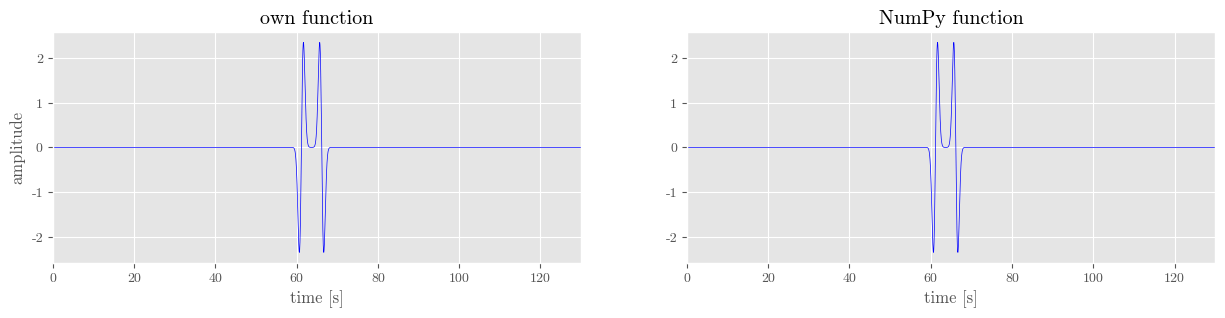

In [12]:
# 计算盒状窗与Ricker小波的卷积
tick1 = time()                                             # 1970.01.01起始秒数
c1 = conv(rk, box)                                         # 卷积计算
tick2 = time()                      

tick3 = time()
c2 = np.convolve(rk, box)                                  
tick4 = time()

delta1=tick2 - tick1                                       
print("1st run: %6.4f seconds needed for calculation"%delta1)
delta2=tick4 - tick3                                       
print("2nd run: %6.4f seconds needed for calculation"%delta2)

# 绘图
print('number of samples of input signals:', npts)
print('number of samples of convolved signal:', len(c1))
npts2 = len(c1)
t2 = np.linspace(0,npts2*dt,npts2)

xmax = 130
plt.subplot(121)
plt.plot(t2, c1, 'b')
plt.xlim(0,xmax)
plt.xlabel('time [s]')
plt.title('own function')
plt.ylabel('amplitude')

plt.subplot(122)
plt.plot(t2, c2, 'b')
plt.xlim(0,xmax)
plt.title('NumPy function')
plt.xlabel('time [s]')

plt.show()

1st run: 9.3488 seconds needed for calculation
2nd run: 0.0043 seconds needed for calculation


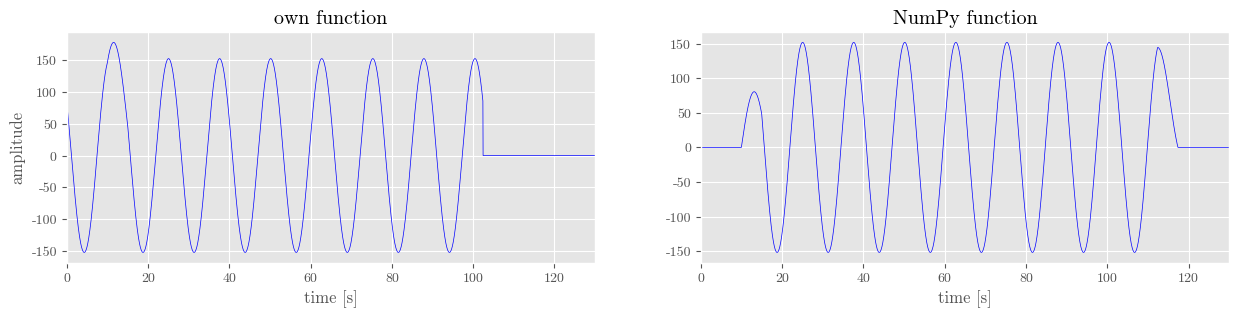

In [13]:
# 用余弦函数对盒状窗进行卷积
tick1 = time()                                            
C1 = conv(cosine, box)                                    
tick2 = time()                     

tick3 = time()
C2 = np.convolve(cosine, box)                             
tick4 = time()

Delt1=tick2 - tick1                                       
print("1st run: %6.4f seconds needed for calculation"%Delt1)
Delt2=tick4 - tick3                                       
print("2nd run: %6.4f seconds needed for calculation"%Delt2)

NPTS2 = len(C1)
T2 = np.linspace(0,NPTS2*dt,NPTS2)

# 绘图
Xmax = 130
plt.subplot(121)
plt.plot(T2, C1, 'b')
plt.xlim(0,Xmax)
plt.xlabel('time [s]')
plt.title('own function')
plt.ylabel('amplitude')

plt.subplot(122)
plt.plot(T2, C2, 'b')
plt.xlim(0,Xmax)
plt.title('NumPy function')
plt.xlabel('time [s]')

plt.show()

 #### 注意

 1) 输入信号都由4096个样本组成。组合它们，我们预期有8192个样本。但是，实际上卷积后的信号只有8191个样本，少了一个样本。这是由于离散卷积的定义所致，非常重要要在数字数据处理中考虑这一点 

 2) 在卷积之前进行锥形处理，不考虑锥形处理，我们将得到错误的结果
 <br>
 ---
### 对噪声数据进行卷积

首先定义一个高斯信号，并用噪声“破坏”它。同时，还定义了一个虚构的卷积函数。然后观察了“干净”数据和“噪声”数据与卷积函数的卷积结果。

---信号1是一个高斯信号，没有噪声，呈现出平滑的形状。<br>
---信号2是基于信号1的噪声版本，具有额外的随机波动。<br>
---信号1与卷积函数进行卷积后，形状与卷积函数相似，但幅度变化较小。噪声的影响被减弱。<br>
---信号2与卷积函数进行卷积后，原本的高斯信号形状基本恢复，但噪声部分仍然存在。

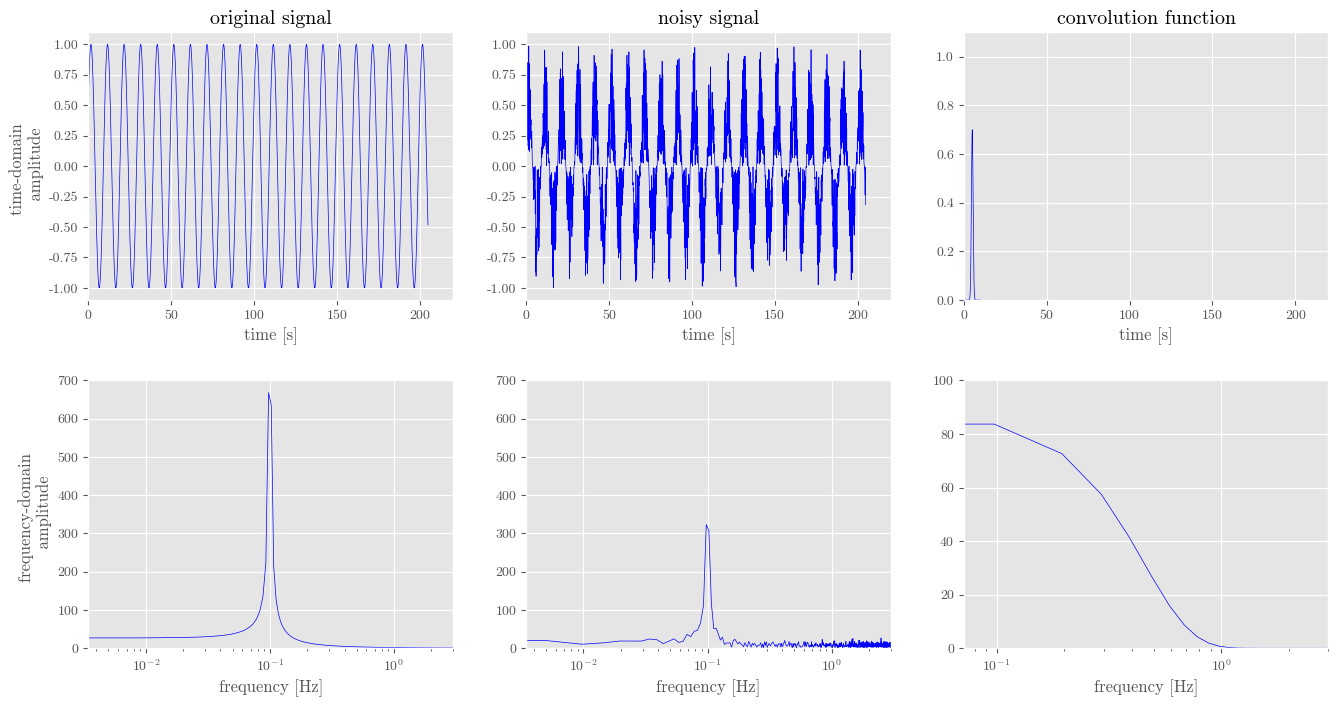

In [14]:
# 设置一个“干净”和“噪声”信号以及卷积函数
samp = 2048                                                     
rate = 0.1                                                      
time = np.linspace(0, samp*rate, samp)                          
sig = np.sin(2*np.pi*rate * time + np.pi/5)                     
nos = sig  * np.random.rand(sig.size)                           

taper_percentage = 0.03                                         
taper = np.bartlett(int(samp * taper_percentage))
taper_left, taper_right = np.array_split(taper, 2)              
taper = np.concatenate([taper_left, np.ones(samp-len(taper)), taper_right])

Sig = sig * taper                                               
Nos = nos * taper

samp2 = 1024                                                    
rate2 = 0.01
gauss = 0.7 * signal.gaussian(samp2, std=50)
tg = np.linspace(0, samp2*rate2, samp2)


# 绘图
plt.rcParams["figure.figsize"] = (16, 8)
xmx = 220                                                       
ymm = 1.1                                                       
xfm = 3                                                         
yfm = 700                                                       

plt.subplot(231)
plt.plot(time, sig, 'b')
plt.title('original signal')
plt.xlim(0, xmx)
plt.ylim(-ymm, ymm)
plt.xlabel('time [s]')
plt.ylabel('time-domain \n amplitude')

plt.subplot(232)
plt.plot(time, nos, 'b')
plt.xlim(0, xmx)
plt.ylim(-ymm, ymm)
plt.title('noisy signal')
plt.xlabel('time [s]')

plt.subplot(233)
plt.plot(tg, gauss, 'b')
plt.xlim(0, xmx)
plt.ylim(0, ymm)
plt.title('convolution function')
plt.xlabel('time [s]')

plt.subplot(234)
Fsig = np.fft.rfft(sig)                                      
f = np.linspace(0, (1/rate)/2, len(Fsig))                     
plt.semilogx(f, abs(Fsig), 'b')
plt.xlim(0,xfm)
plt.ylim(0,yfm)
plt.xlabel('frequency [Hz]')
plt.ylabel('frequency-domain \n amplitude')

plt.subplot(235)
Fnos = np.fft.rfft(nos)                                       
plt.semilogx(f, abs(Fnos), 'b')
plt.xlim(0,xfm)
plt.ylim(0,yfm)
plt.xlabel('frequency [Hz]')

plt.subplot(236)
GAUSS = np.fft.rfft(gauss)                                     
fg = np.linspace(0, (1/rate2)/2, len(GAUSS))
plt.semilogx(fg, abs(GAUSS), 'b')
plt.xlim(0,xfm)
plt.ylim(0,yfm/7)
plt.xlabel('frequency [Hz]')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


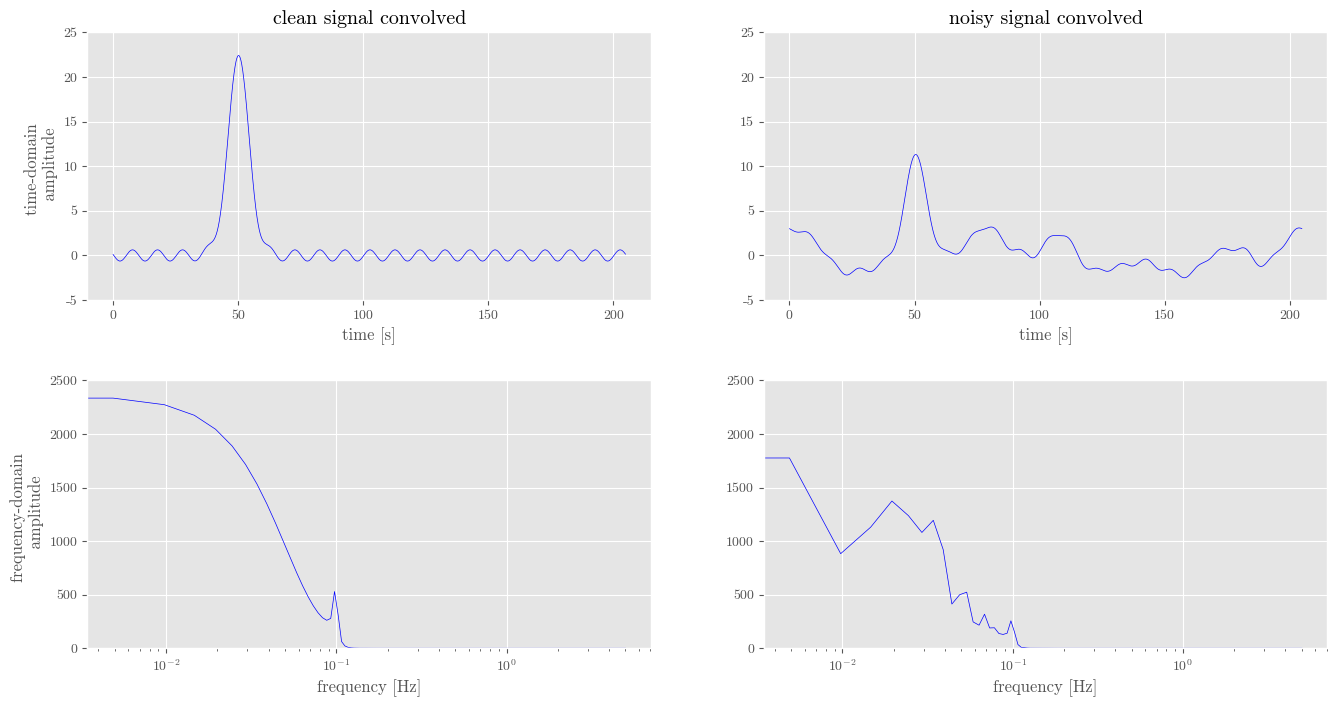

In [15]:
# 将两个信号与“特征”卷积

padding_factor = samp/samp2                     
G = np.fft.rfft(gauss, n=int(len(gauss)*padding_factor))        
Sconv = np.fft.irfft(G * Fsig)                                  
Nconv = np.fft.irfft(G * Fnos)                                 

# plot 
tc = np.linspace(0, len(Nconv)*rate, len(Nconv))               
plt.rcParams["figure.figsize"] = (16, 8)
ymin = -5
ymax = 25
fym = 2500

plt.subplot(221)
plt.plot(tc, Sconv, 'b')
plt.ylim(ymin,ymax)
plt.title('clean signal convolved')
plt.xlabel('time [s]')
plt.ylabel('time-domain \n amplitude')

plt.subplot(222)
plt.plot(tc, Nconv, 'b')
plt.ylim(ymin,ymax)
plt.title('noisy signal convolved')
plt.xlabel('time [s]')

plt.subplot(223)
SC = np.fft.rfft(Sconv)
fac = np.linspace(0, (1/rate)/2, len(SC))
plt.semilogx(fac, abs(SC), 'b')
plt.ylim(0,fym)
plt.xlabel('frequency [Hz]')
plt.ylabel('frequency-domain \n amplitude')

plt.subplot(224)
NC = np.fft.rfft(Nconv)
plt.ylim(0,fym)
plt.semilogx(fac, abs(NC), 'b')
plt.xlabel('frequency [Hz]')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

#### 总结

 1) 原始信号是非常纯净和清晰的信号。不仅在时域上，而且在频域上，幅度谱显示出一个明显的峰值，最大幅度接近700。这个频谱说明，这是一个仅由单一频率构成的信号。相比之下，带有噪声的信号在时域上看起来...有噪声。但仍然可以辨认出占主导地位的正弦波，但最小/最大幅度有所偏差，可以看到信号中有更多的信息。这些额外的信息在噪声信号的幅度谱中更加明显。可以看到信息频率高于和低于主导的1Hz正弦波。因此，最大幅度要小得多，因为剩余的幅度被“分散”在噪声中。线性系统的特征由一个简单的高斯函数在时域上描述，其峰值幅度约在5秒附近，并且远小于信号的幅度。这个高斯函数的幅度谱的傅里叶变换是一个具有更宽范围的高斯函数。这是由于不确定性原理，是傅里叶变换特性的另一个效应。

 2) 清晰信号的卷积结果非常好。在频域中，可以清楚地区分信号和卷积函数的信息。带有噪声的数据的卷积结果明显受到噪声的扭曲。在时域中，仍然可以区分卷积函数的峰值，但在频域中一切都变得模糊。但仍然可以看到0.1 Hz处的峰值。如果这是真实数据，将不能确定这是否是真实的或者是噪声的产物。 
